# Predict on Test

reference : https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np
import joblib

In [2]:
PATH_DATA = '../data/'
PATH_MODEL = '../artifacts/'

In [3]:
def eval_ts(y_true, y_pred):
    eval_dict = {}
    eval_dict['mae'] = mean_absolute_error(y_true,y_pred)
    eval_dict['mape'] = mean_absolute_percentage_error(y_true,y_pred)
    eval_dict['mse'] = mean_squared_error(y_true,y_pred)
    eval_dict['rmse'] = np.sqrt(eval_dict['mse'])

    df_eval = pd.DataFrame([eval_dict]).transpose()
    df_eval.columns = ['Evaluations']

    return df_eval

### Get Data and model

In [4]:
df_test = pd.read_csv(PATH_DATA + 'ts_test.csv')
model_ts_load = joblib.load(PATH_MODEL+'model_ts_v1.pkl')

c:\Users\amoza\anaconda3\envs\myprophet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_ts_load

In [6]:
df_test.head(8)

,Date,Temp
0,1990-01-01,14.8
1,1990-01-02,13.3
2,1990-01-03,15.6
3,1990-01-04,14.5
4,1990-01-05,14.3
5,1990-01-06,15.3
6,1990-01-07,16.4
7,1990-01-08,14.8


In [7]:
## Check the types again

df_test.dtypes

Date     object
Temp    float64
dtype: object

In [8]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [9]:
## Make Sure the date types
df_test.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [10]:
## Change columns name
df_test_ready = df_test.rename(columns={'Date':'ds', 'Temp':'y'})
df_test_ready.head()

,ds,y
0,1990-01-01,14.8
1,1990-01-02,13.3
2,1990-01-03,15.6
3,1990-01-04,14.5
4,1990-01-05,14.3


### Forecast on Test

it is called "Out-Sample Forecast"

In [11]:
# get sample date from train --> all days in 1989
date_of_all_sample = df_test_ready['ds']
df_date_test = pd.DataFrame(date_of_all_sample)
df_date_test

,ds
0,1990-01-01
1,1990-01-02
2,1990-01-03
3,1990-01-04
4,1990-01-05
...,...
360,1990-12-27
361,1990-12-28
362,1990-12-29
363,1990-12-30


In [12]:
## predict the sample
forecast_test = model_ts_load.predict(df_date_test)

In [13]:
## forecast is dataframe pandas with many columns in it
## just focus on this 4.
## yhat is the one point prediction, lower and upper is Confidence Interval
## Prediction must be a range, it depend on us how to present it

df_forecast_test = forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df_forecast_test

,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,13.750557,10.363241,16.801323
1,1990-01-02,13.766697,10.376098,16.994319
2,1990-01-03,13.870779,10.435875,17.282201
3,1990-01-04,14.141689,10.810800,17.630484
4,1990-01-05,13.953401,10.651763,17.204484
...,...,...,...,...
360,1990-12-27,12.716225,9.431415,16.036711
361,1990-12-28,12.450862,9.110185,15.956549
362,1990-12-29,12.615887,9.488657,15.939326
363,1990-12-30,12.579810,9.133963,15.709592


In [14]:
df_forecast_test['true_y'] = df_test_ready['y'][:]

C:\Users\amoza\AppData\Local\Temp\ipykernel_23500\1431900814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast_test['true_y'] = df_test_ready['y'][:]


In [15]:
df_forecast_test.head()

,ds,yhat,yhat_lower,yhat_upper,true_y
0,1990-01-01,13.750557,10.363241,16.801323,14.8
1,1990-01-02,13.766697,10.376098,16.994319,13.3
2,1990-01-03,13.870779,10.435875,17.282201,15.6
3,1990-01-04,14.141689,10.810800,17.630484,14.5
4,1990-01-05,13.953401,10.651763,17.204484,14.3


### Visualization

In [16]:
## visualization propose
df_forecast_vis = df_forecast_test.set_index('ds')

<AxesSubplot: xlabel='ds'>

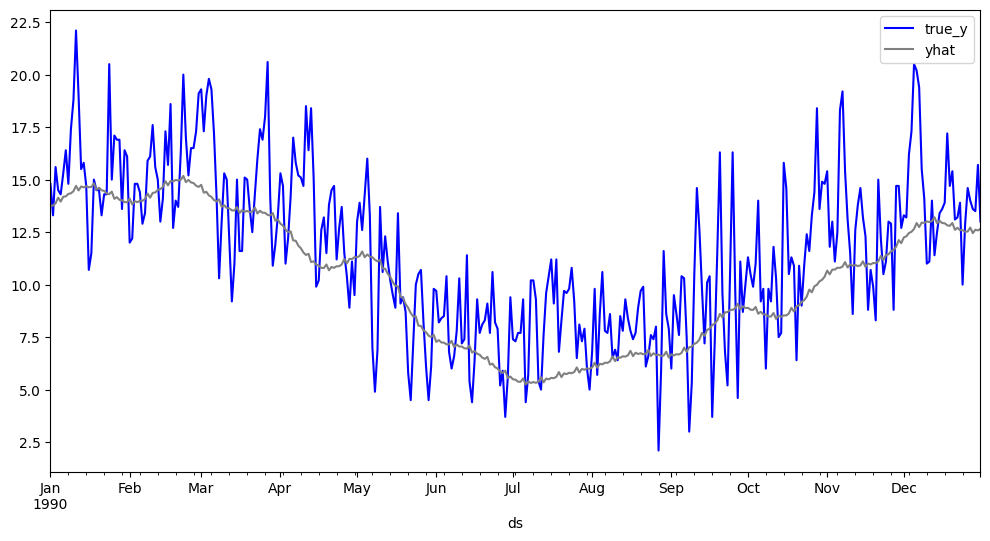

In [17]:
df_forecast_vis[['true_y','yhat']].plot(figsize = (12,6), color=['b','gray'])

<AxesSubplot: xlabel='ds'>

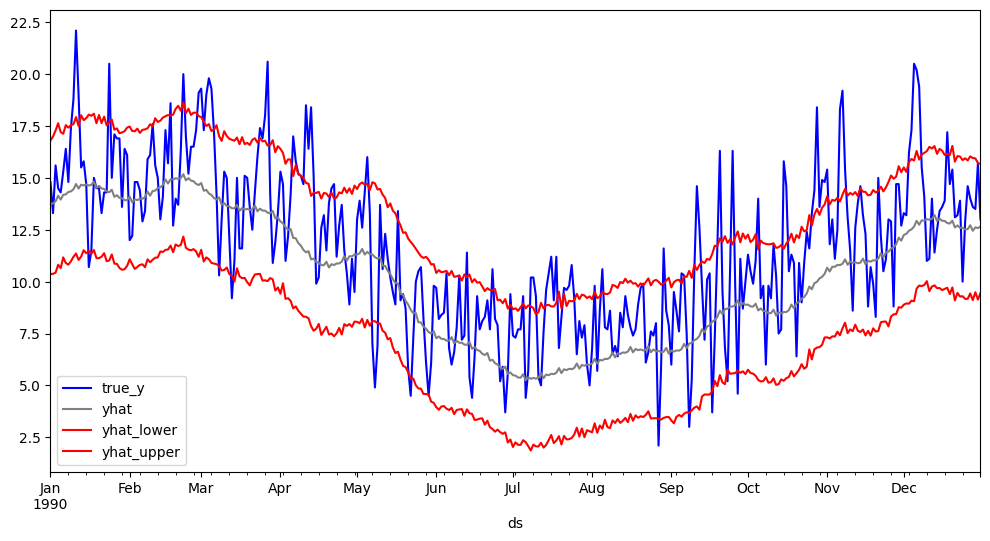

In [19]:
## visualization with range
## as you can see the prediction quite shifting


df_forecast_vis[['true_y','yhat','yhat_lower', 'yhat_upper']].plot(figsize = (12,6), color=['b','gray','r','r'])

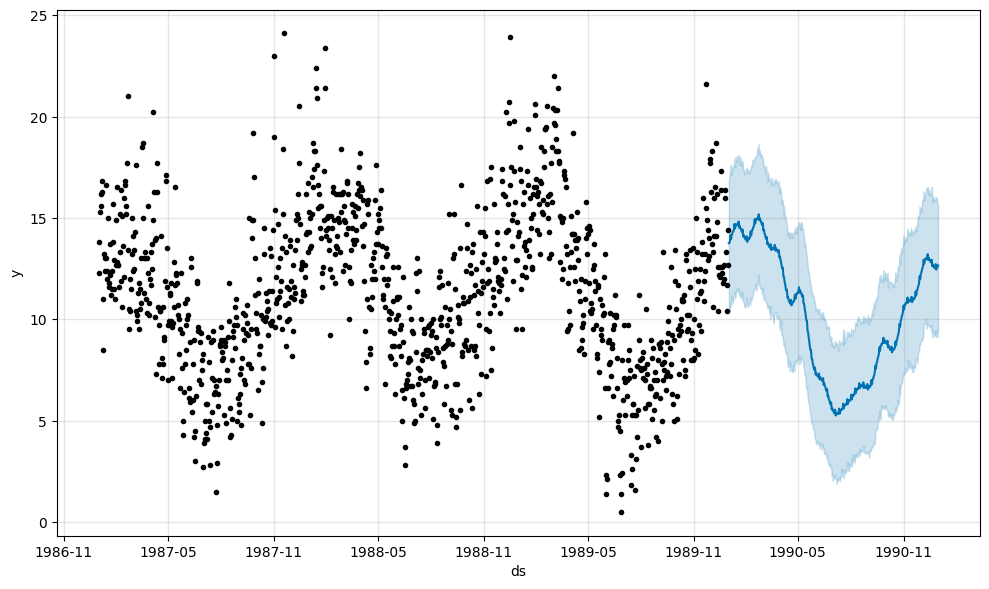

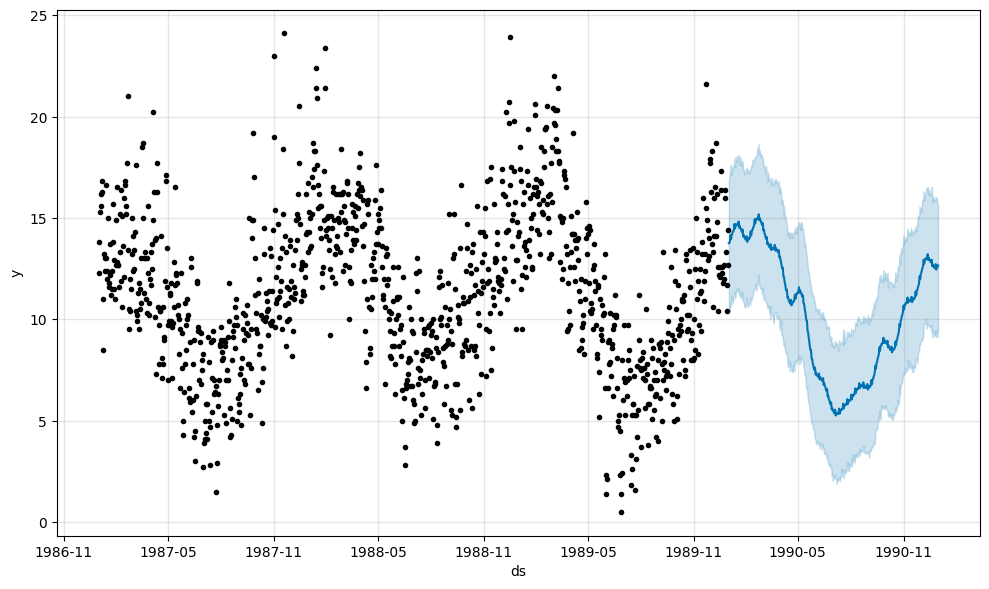

In [21]:
## or you can directly use model_ts1 to forecast

model_ts_load.plot(forecast_test)

## Evaluate Results

In [22]:
df_forecast_test.head()


,ds,yhat,yhat_lower,yhat_upper,true_y
0,1990-01-01,13.750557,10.363241,16.801323,14.8
1,1990-01-02,13.766697,10.376098,16.994319,13.3
2,1990-01-03,13.870779,10.435875,17.282201,15.6
3,1990-01-04,14.141689,10.810800,17.630484,14.5
4,1990-01-05,13.953401,10.651763,17.204484,14.3


In [23]:
eval_ts(df_forecast_test['true_y'],df_forecast_test['yhat'])

,Evaluations
mae,2.258180
mape,0.207990
mse,8.219336
rmse,2.866938
